# Exercises on Linear Models in R
* Author: Oliver Kretzschmar
* Last Update: 2019-11-22

## Solve the tasks ...

Your solution should contain 
* the implemented code in code-cells, 
* the output of this code 
* and optionally your remarks, discussion, comments on the solution in markdown-cells.

Send me the resulting Jupyter notebook.

## Tasks

Read and understand the lecture [Linear Regression for Non-Linear Functions](../06%20LinearNonLinearRegression/03%20NonLinearRegression.ipynb).

Then read the data from [ads.csv](../data/ads.csv) into an R dataframe. The data come from investigations how different parameters will effect the Click-Through-Rate (CTR) at a marketing ad, e.g. ad of Google Adwords (Google Ads). The CTR is the ratio between the number of users which click at our ad and the number of all users which see our ad in percent. The higher the CTR the better we can address user for our brand, product, service or company and the better impact our paid ad. The description of our data structure:

* 'CTR': Click Through Rate from 0 to 100%
* 'PriceBid': This is the bid for paying a price that my ad is placed, e.g. at search result page at Google
* 'QualityLevel': Is the quality judgement of my ad, my landing page and my offering by the search engine and ranges from 0-100 points. The higher the better
* 'IsResponsive': Is my ad responsive design and so usable at mobile etc.
* 'Impressions': how often was my ad shown
* 'CompetitionLevel': What is the competition intensity which mean how many companies also want to book an ad at the same search keywords. Ranges from "low", "middle" to "high".

In [7]:
library(tidyverse)
library(modelr)
library(rsample)  
library(recipes) 
library(IDPmisc) 
library(gridExtra) #grid function ggplot
data <- read.csv(file="../data/ads.csv", header=TRUE,sep=",")
#Omit Observations With NA, NaN, Inf And -Inf Values
data <- NaRV.omit(data)

In [8]:
#get overview over pairwise correlations

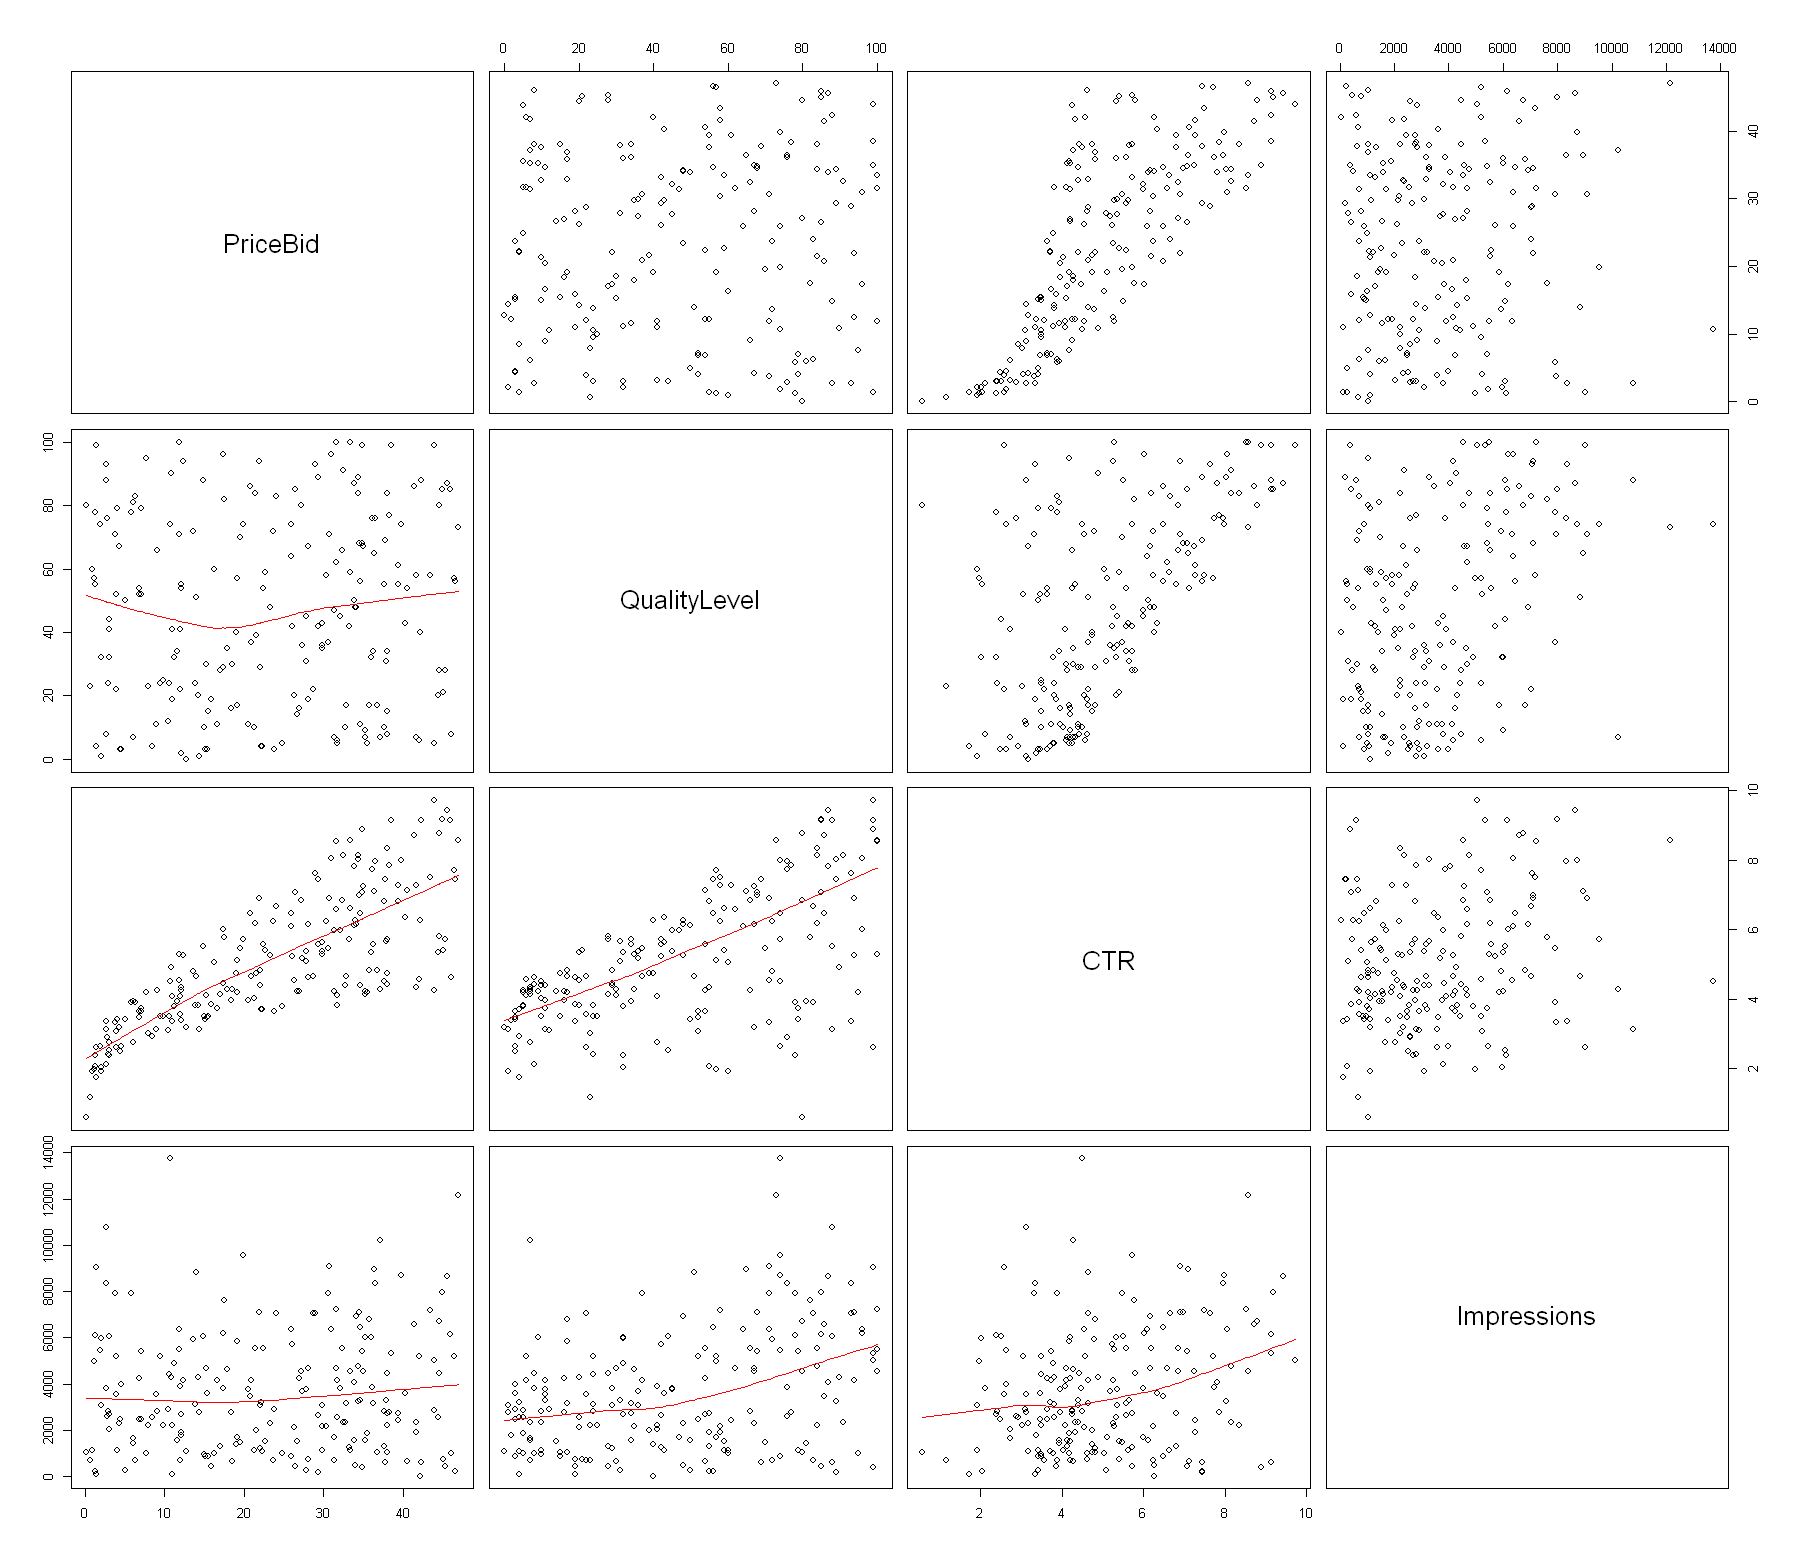

In [9]:
options(repr.plot.res = 120, repr.plot.height=13, repr.plot.width=15)  #Defaults:resolution=120,width/height=7

pairs(data[, c('PriceBid','QualityLevel',
                    'CTR','Impressions')], 
      lower.panel = panel.smooth)


1. Do a linear regression analysis additionally including so called interaction terms (as described above in "Linear Regression for Non-Linear Functions") and try to find the best interaction term combination to predict 'CTR' by comparing the model evaluation parameters 'R2' and 'RSE' of the linear model and the linear model with interaction terms.

2. Write down, how was your process to find the best interaction term combination for that model.

In [11]:
RMSE = function(m, o){
  sqrt(mean((m - o)^2))
}

In [13]:
R2 <- function (x, y) cor(x, y) ^ 2

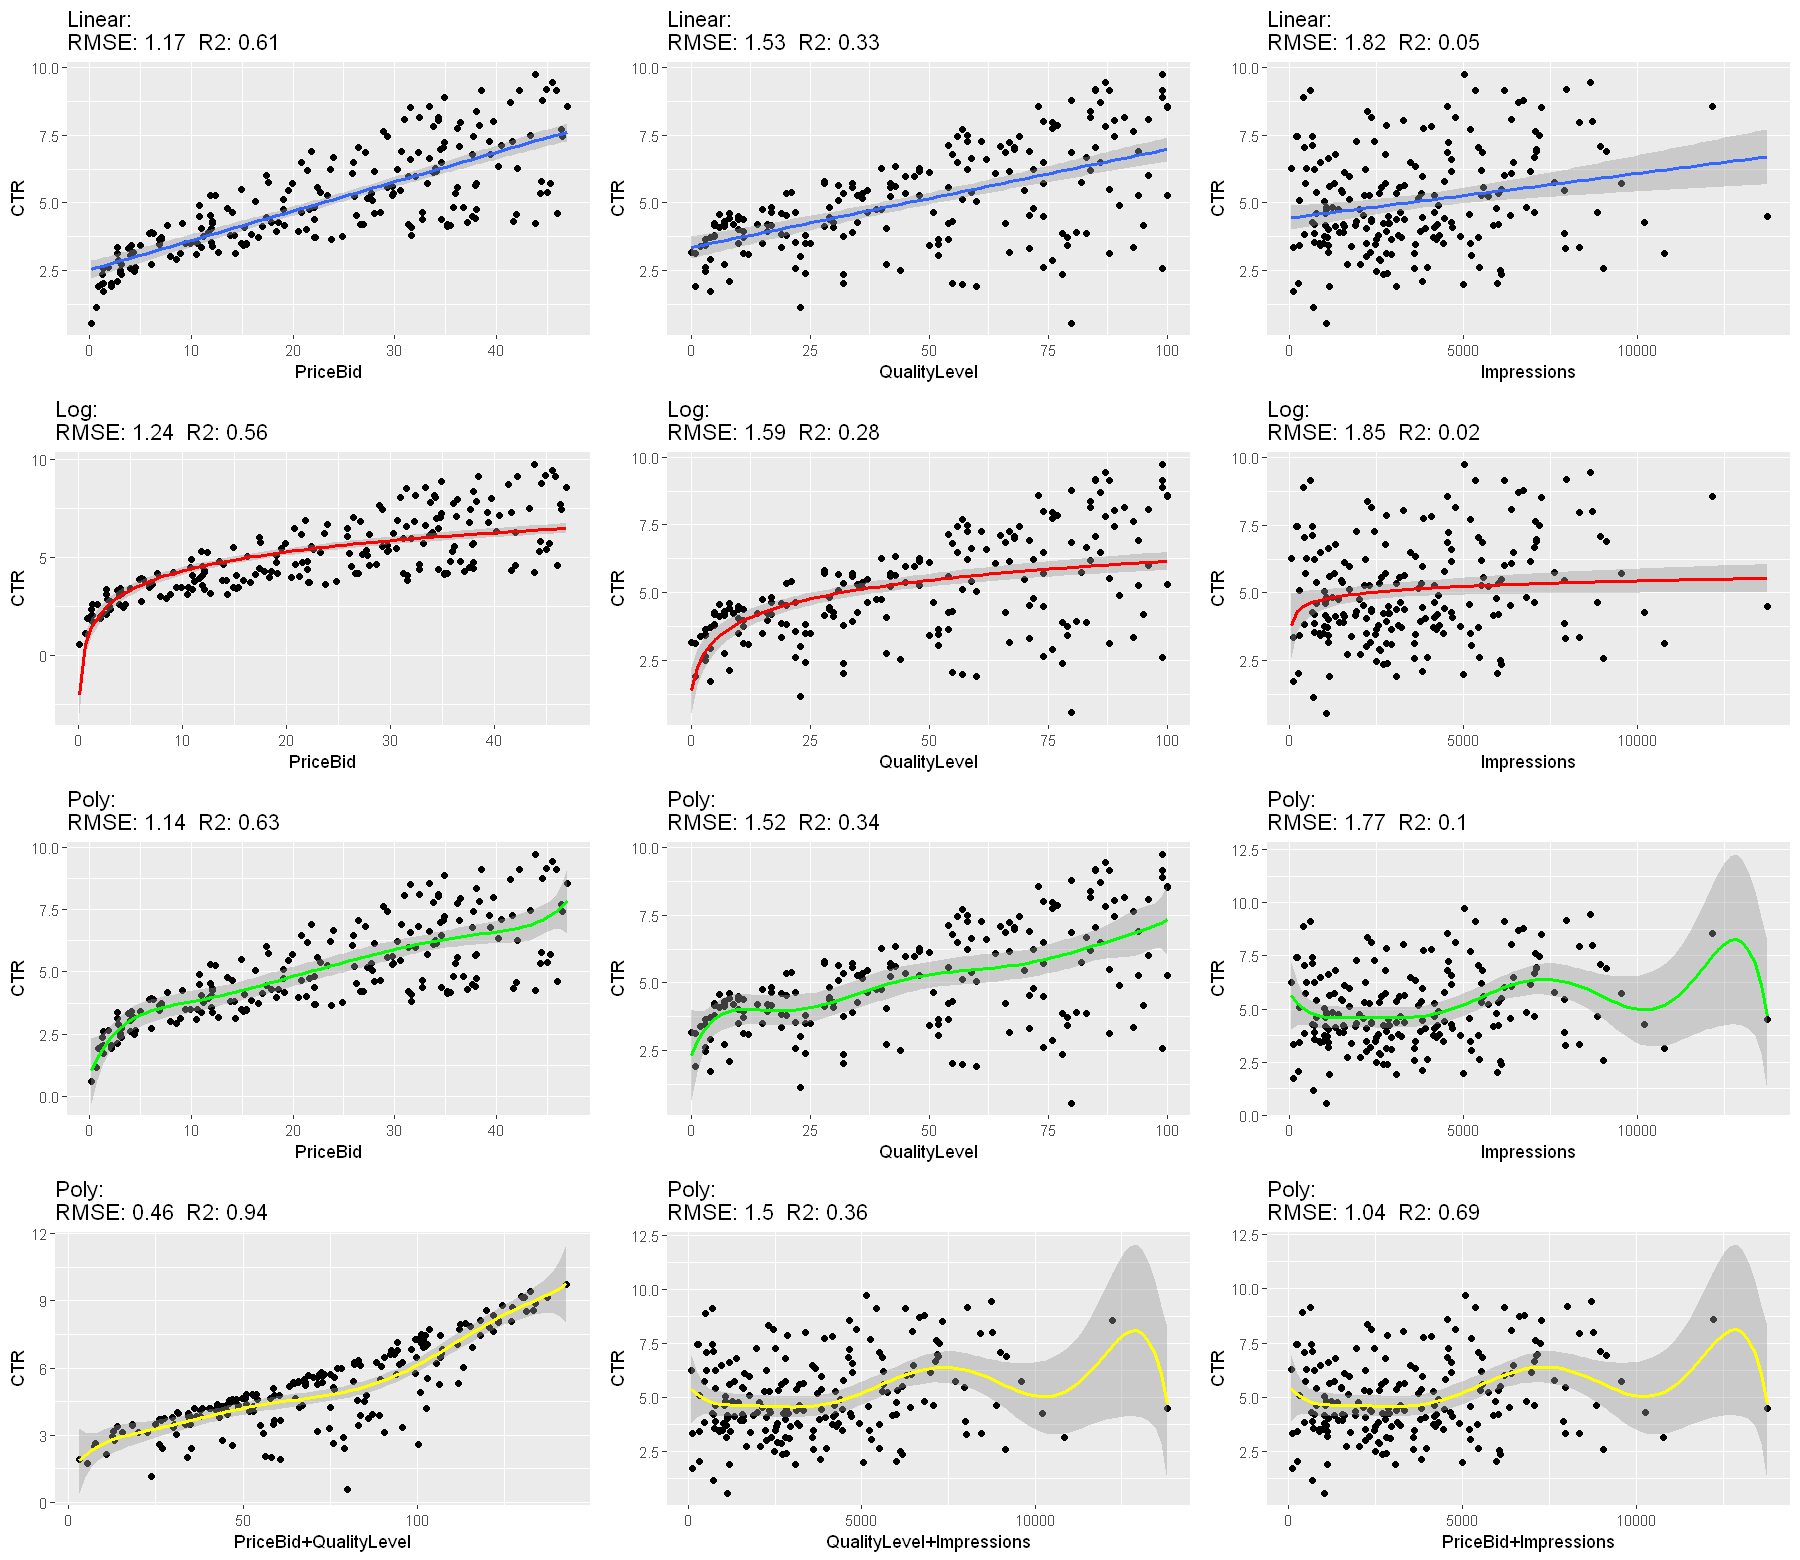

In [14]:
library(gridExtra)
library(ggplot2)
plotlist <- list()
i=1

model <- lm(CTR ~ PriceBid, data = data)
predictions <- model %>% predict(data)
text=paste("Linear:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=PriceBid, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ (x))+ labs(x = "PriceBid") +ggtitle(text) 
i<-i+1

model <- lm(CTR ~ QualityLevel, data = data)
predictions <- model %>% predict(data)
text=paste("Linear:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=QualityLevel, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ (x))+ labs(x = "QualityLevel")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~ Impressions, data = data)
predictions <- model %>% predict(data)
text=paste("Linear:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=Impressions, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ (x))+ labs(x = "Impressions")+ggtitle(text) 
i<-i+1

#############################################################################################################

model <- lm(CTR ~ log(PriceBid), data = data)
predictions <- model %>% predict(data)
text=paste("Log:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=PriceBid, y=CTR))+geom_point() +stat_smooth(method = lm, formula = y ~ log(x),col="red")+ labs(x = "PriceBid")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~ log(QualityLevel+1), data = data)
predictions <- model %>% predict(data)
text=paste("Log:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=QualityLevel, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ log(x+1),col="red")+ labs(x = "QualityLevel")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~ log(Impressions), data = data)
predictions <- model %>% predict(data)
text=paste("Log:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=Impressions, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ log(x),col="red")+ labs(x ="Impressions")+ggtitle(text) 
i<-i+1

#############################################################################################################

model <- lm(CTR ~  poly(PriceBid, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=PriceBid, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="green")+ labs(x = "PriceBid")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~  poly(QualityLevel, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=QualityLevel, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="green")+ labs(x = "QualityLevel")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~  poly(Impressions, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=Impressions, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="green")+ labs(x = "Impressions")+ggtitle(text) 
i<-i+1
#############################################################################################################

model <- lm(CTR ~  poly(PriceBid, 7, raw = TRUE)+poly(QualityLevel, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=PriceBid+QualityLevel, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="yellow")+ labs(x = "PriceBid+QualityLevel")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~  poly(QualityLevel, 7, raw = TRUE)+poly(Impressions, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=QualityLevel+Impressions, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="yellow")+ labs(x = "QualityLevel+Impressions")+ggtitle(text) 
i<-i+1

model <- lm(CTR ~  poly(PriceBid, 7, raw = TRUE)+poly(Impressions, 7, raw = TRUE), data = data)
predictions <- model %>% predict(data)
text=paste("Poly:\nRMSE:",round(RMSE(predictions, data$CTR),digits=2)," R2:",round(R2(predictions, data$CTR),digits=2))
plotlist[[i]]<-ggplot(data, aes(x=PriceBid+Impressions, y=CTR) )+geom_point() +stat_smooth(method = lm, formula = y ~ poly(x, 7, raw = TRUE),col="yellow")+ labs(x = "PriceBid+Impressions")+ggtitle(text) 
i<-i+1



do.call(grid.arrange,plotlist)

Zunächst wurde die Abhängikeit zwischen einzelnen Spalten und der Spalte CTR untersucht. In der Farbe Blau wurden lineare Abhängikeiten zu allen anderen nummerischen Spalten getestet, in Rot die Logarithmischen Abghängikeiten und in Grün die Polynomiale Abhängigkeitn. 
Das 1. grüne Schaubild welches eine Polynomiale Abhängikeit von CTR und PRiceBid abbildet schneidet in Bezug auf den RMSE und dem R2 Wert am besten ab.

In gelb wurde die Abhängikeit zu mehreren Spalten analysiert. Da im ersten Schritt gezeigt wurde, dass sich die Daten mit der Polynomial Funktion am besten abbilden lassen wurde nun diese weiter verwendet. Die besten Ergebnise liefert eine Kombination aus PriceBid und QualityLevel. 
Der RMSE und R2 Wert übertrifft sogar die Modellierung mit nur der Spalte PriceBid.
